# DMA COURSE PROJECT
### 5th Sem, CSE 
### Team 07 
|             NAME            	|          USN        	|
|:---------------------------:	|:-------------------:	|
|         Arpit   Arora       	|     01FE19BCS232    	|
|          Yash   Raj         	|     01FE19BCS229    	|
|     Sivanand   Mahapatra    	|     01FE19BCS230    	|
|        Nitish   Kumar       	|     01FE19BCS227    	|
|           Nihad   J         	|     01FE19BCS260    	|


## 5DMACP05 - Cryptocurrency Closing Price Prediction Challenge 




## 1. Problem Statement

> After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.


## 2. Data

[Dataset from Zindi](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data), 

There are 3 datasets:
1. **Train.csv** - contains the target. This is the dataset that you will use to train your model..
2. **Test.csv** - resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to..
3. **SampleSubmission.csv** - shows the submission format for this competition, with the ‘id’ column mirroring that of Test.csv and the close column containing your predictions.

## 3. Evaluation

For this problem, our main goal is to reach and exceed a given threshold (a specified RMSE score) in the final developed model.

To see how well our model is doing, we'll calculate the RMSE and then compare our results to others on the [Zindi leaderboard](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/leaderboard).

## 4. Features

For this dataset, Zindi provided a [data dictionary](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data)  which contains information about what each attribute of the dataset means. 

The target value is the closing price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021).

## EDA

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# other
import warnings; warnings.filterwarnings('ignore')

### Loading datasets

In [231]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

### Exploring the data

In [232]:
train.shape, test.shape

((12632, 49), (6222, 48))

In [234]:
train.head() 

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [5]:
train.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,1.0,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [7]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631050e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771070e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### Missing values

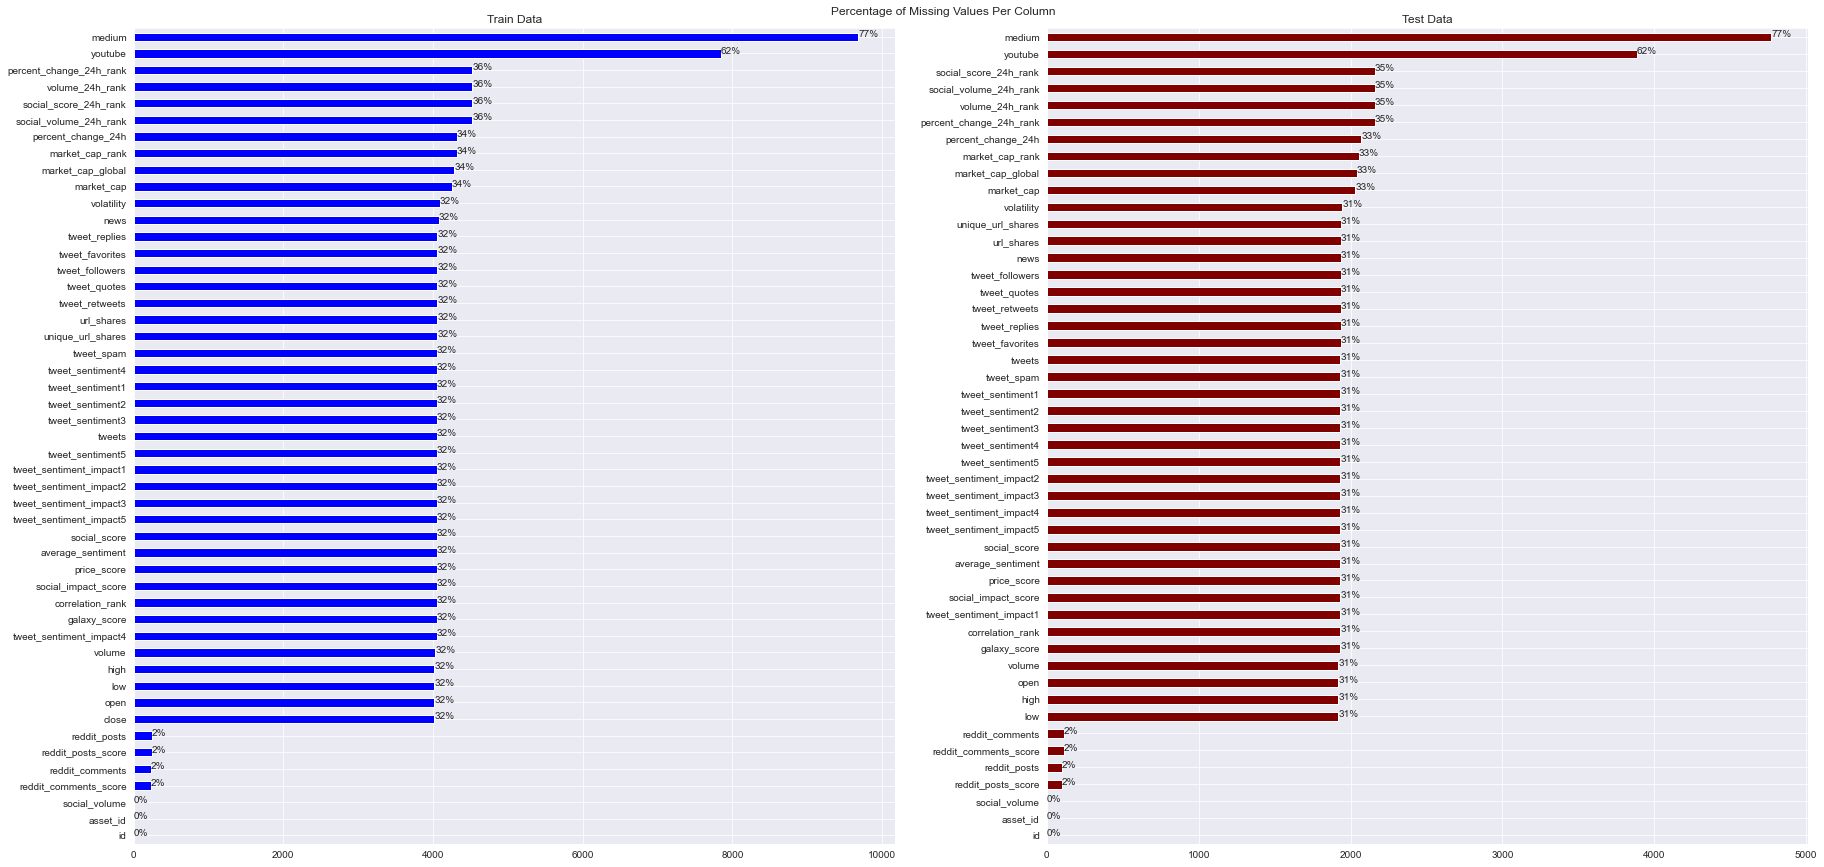

In [8]:
# Check if there any missing values in train set
fig, ax = plt.subplots(1,2, figsize = (30, 15))
fig.suptitle('Percentage of Missing Values Per Column', y=0.90, fontdict={'size': 15})
# plotting training data
ax_0 = train.isna().sum().sort_values().plot(kind = 'barh', ax=ax[0], color='blue')
ax[0].set_title('Train Data', fontdict={'size':12})

# plotting testing data
ax_1 = test.isna().sum().sort_values().plot(kind = 'barh', ax=ax[1], color='maroon')
ax[1].set_title('Test Data', fontdict={'size':12})

# adding percentage to bars
for i in range(2):
    plot = eval('ax_'+str(i))
    data = [train, test]
    for p in plot.patches:
        percentage ='{:,.0f}%'.format((p.get_width()/data[i].shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        plot.annotate(percentage,(x,y))


From the above graph we can see that
* Our Target columns `close` has around 32% missing values
* `medium` and `youtube` columns have highest missing values of 77% and 62% respectively

### Skewness
#### Lets visualize the skewness of the data

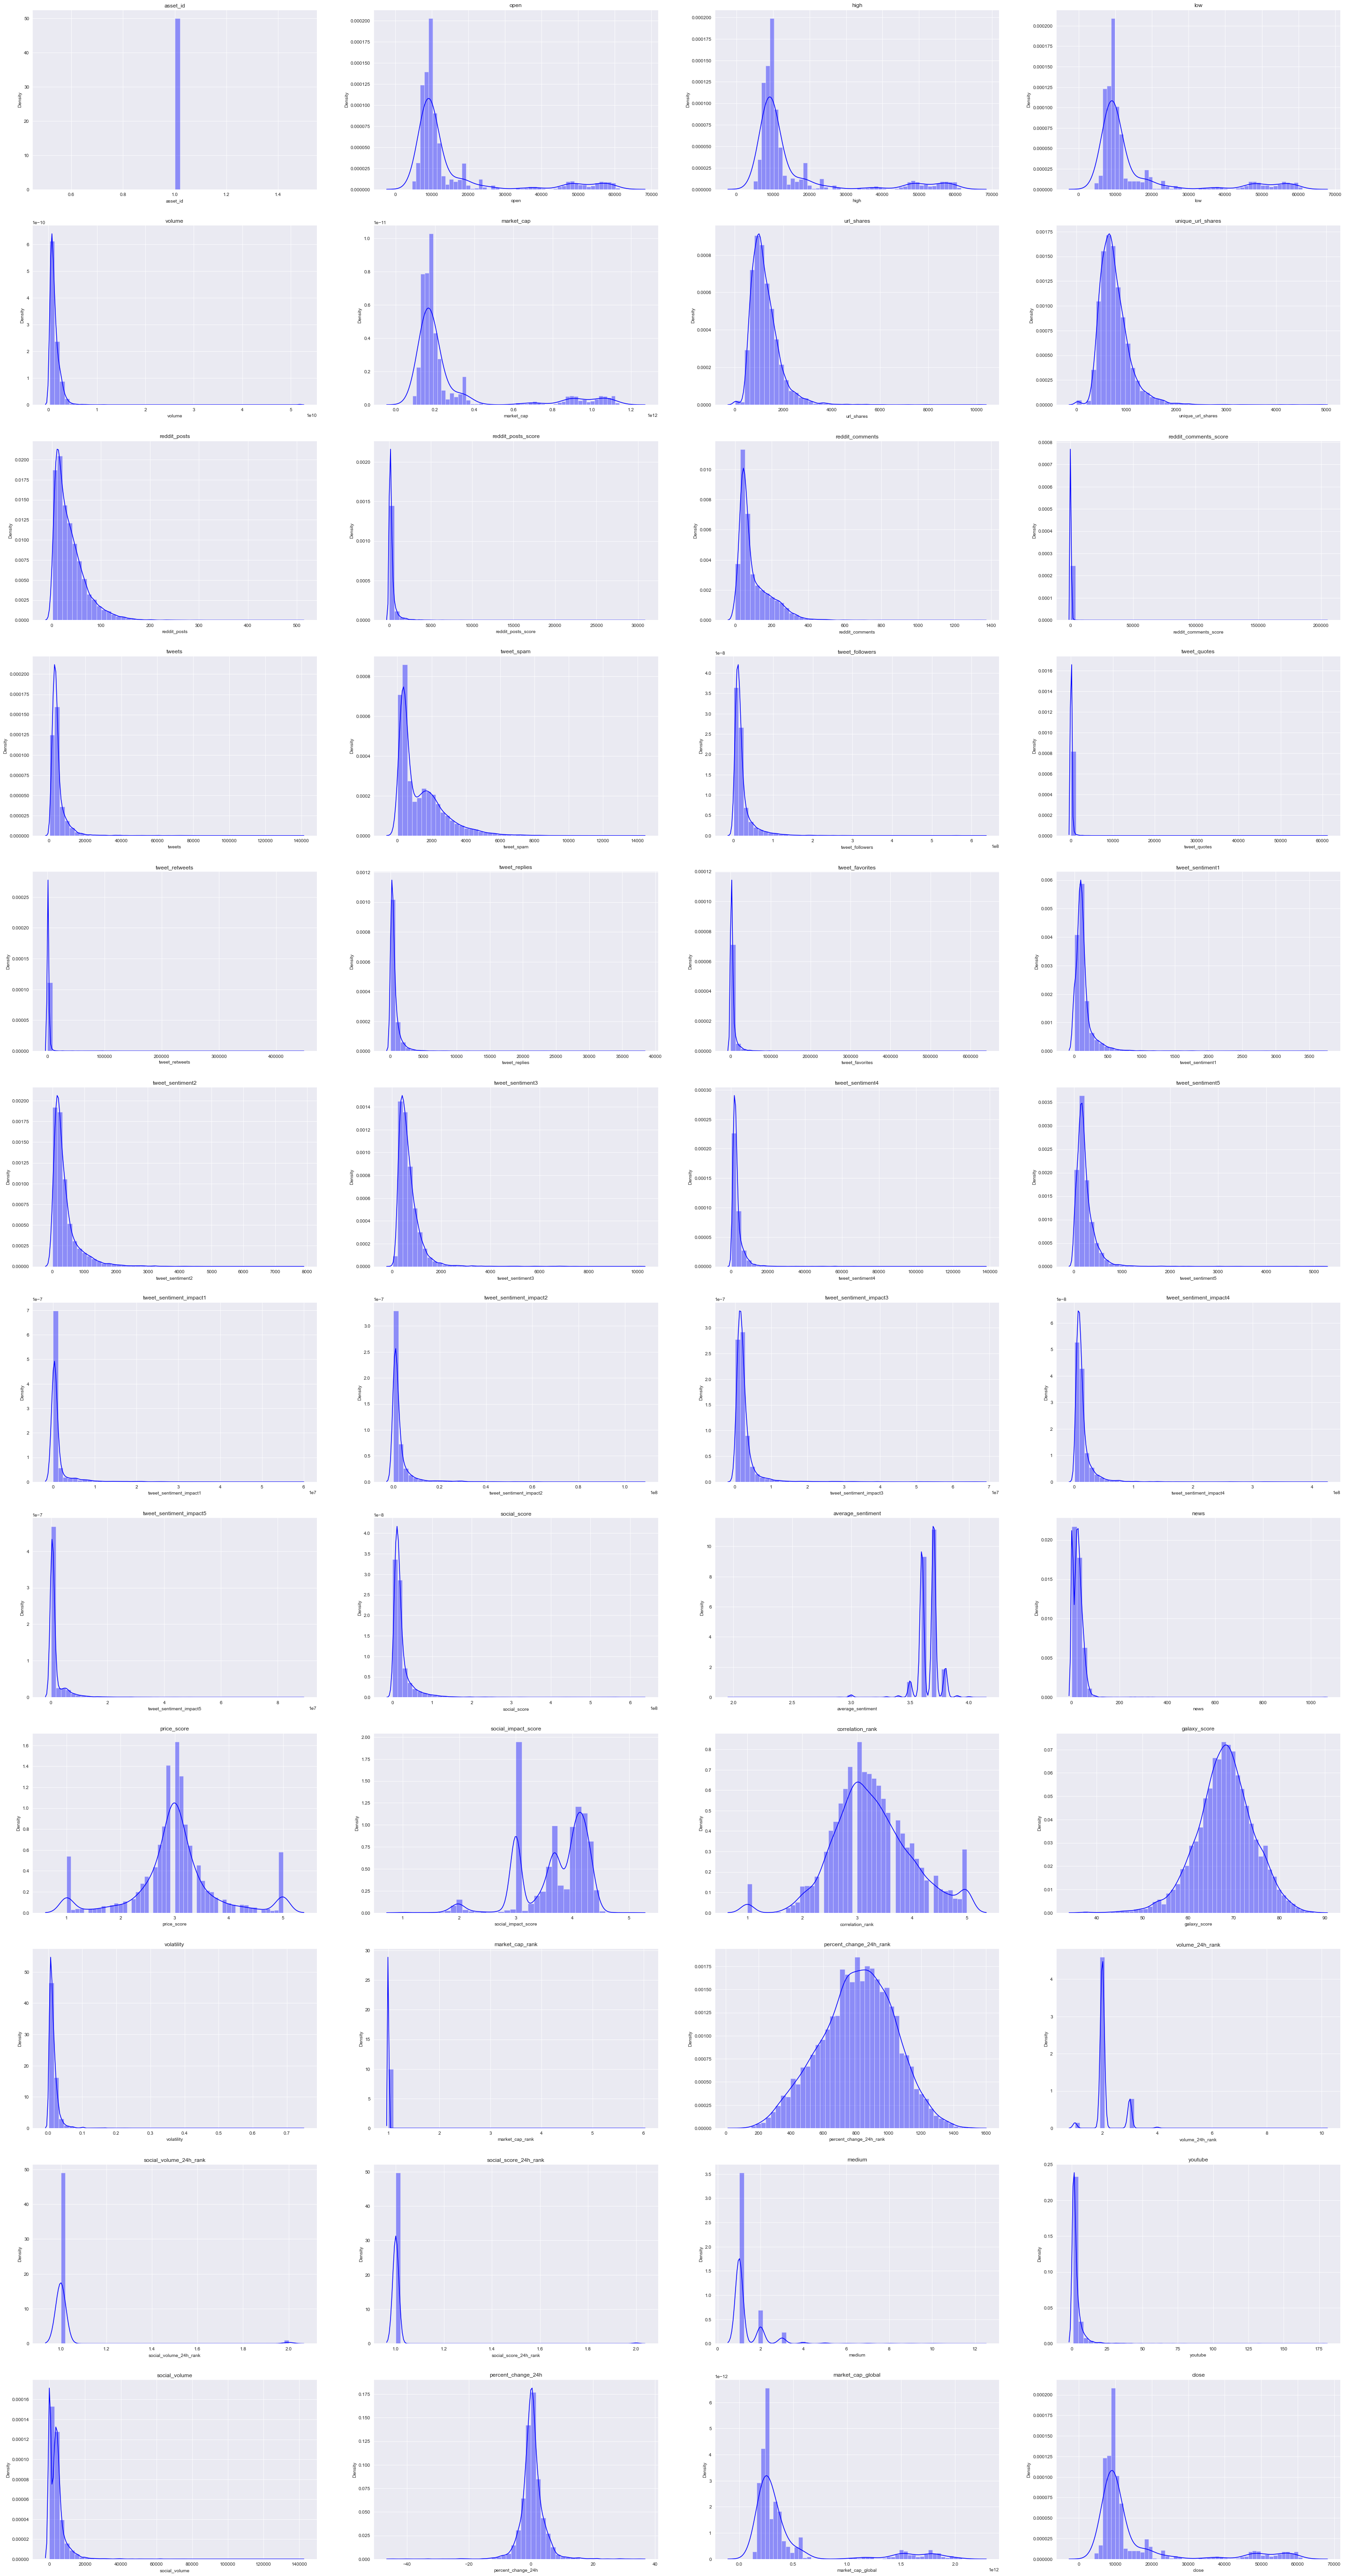

In [9]:
fig, ax = plt.subplots(12, 4, figsize=(50, 100))
col = 0
column = train.drop('id', axis=1).columns
for i in range(12):
    for j in range(4):
        sns.distplot(train[column[col]], color='blue', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1


* Almost all columns are left skewed which means we have a huge number of less values values
* Few columns such as `price_score`, `correlation_rank`, `galaxy_score`, `percent_change_24h_rank` and `percent_change_24h` are almost normally distributed.

### Boxplot
#### Boxplot of each columns

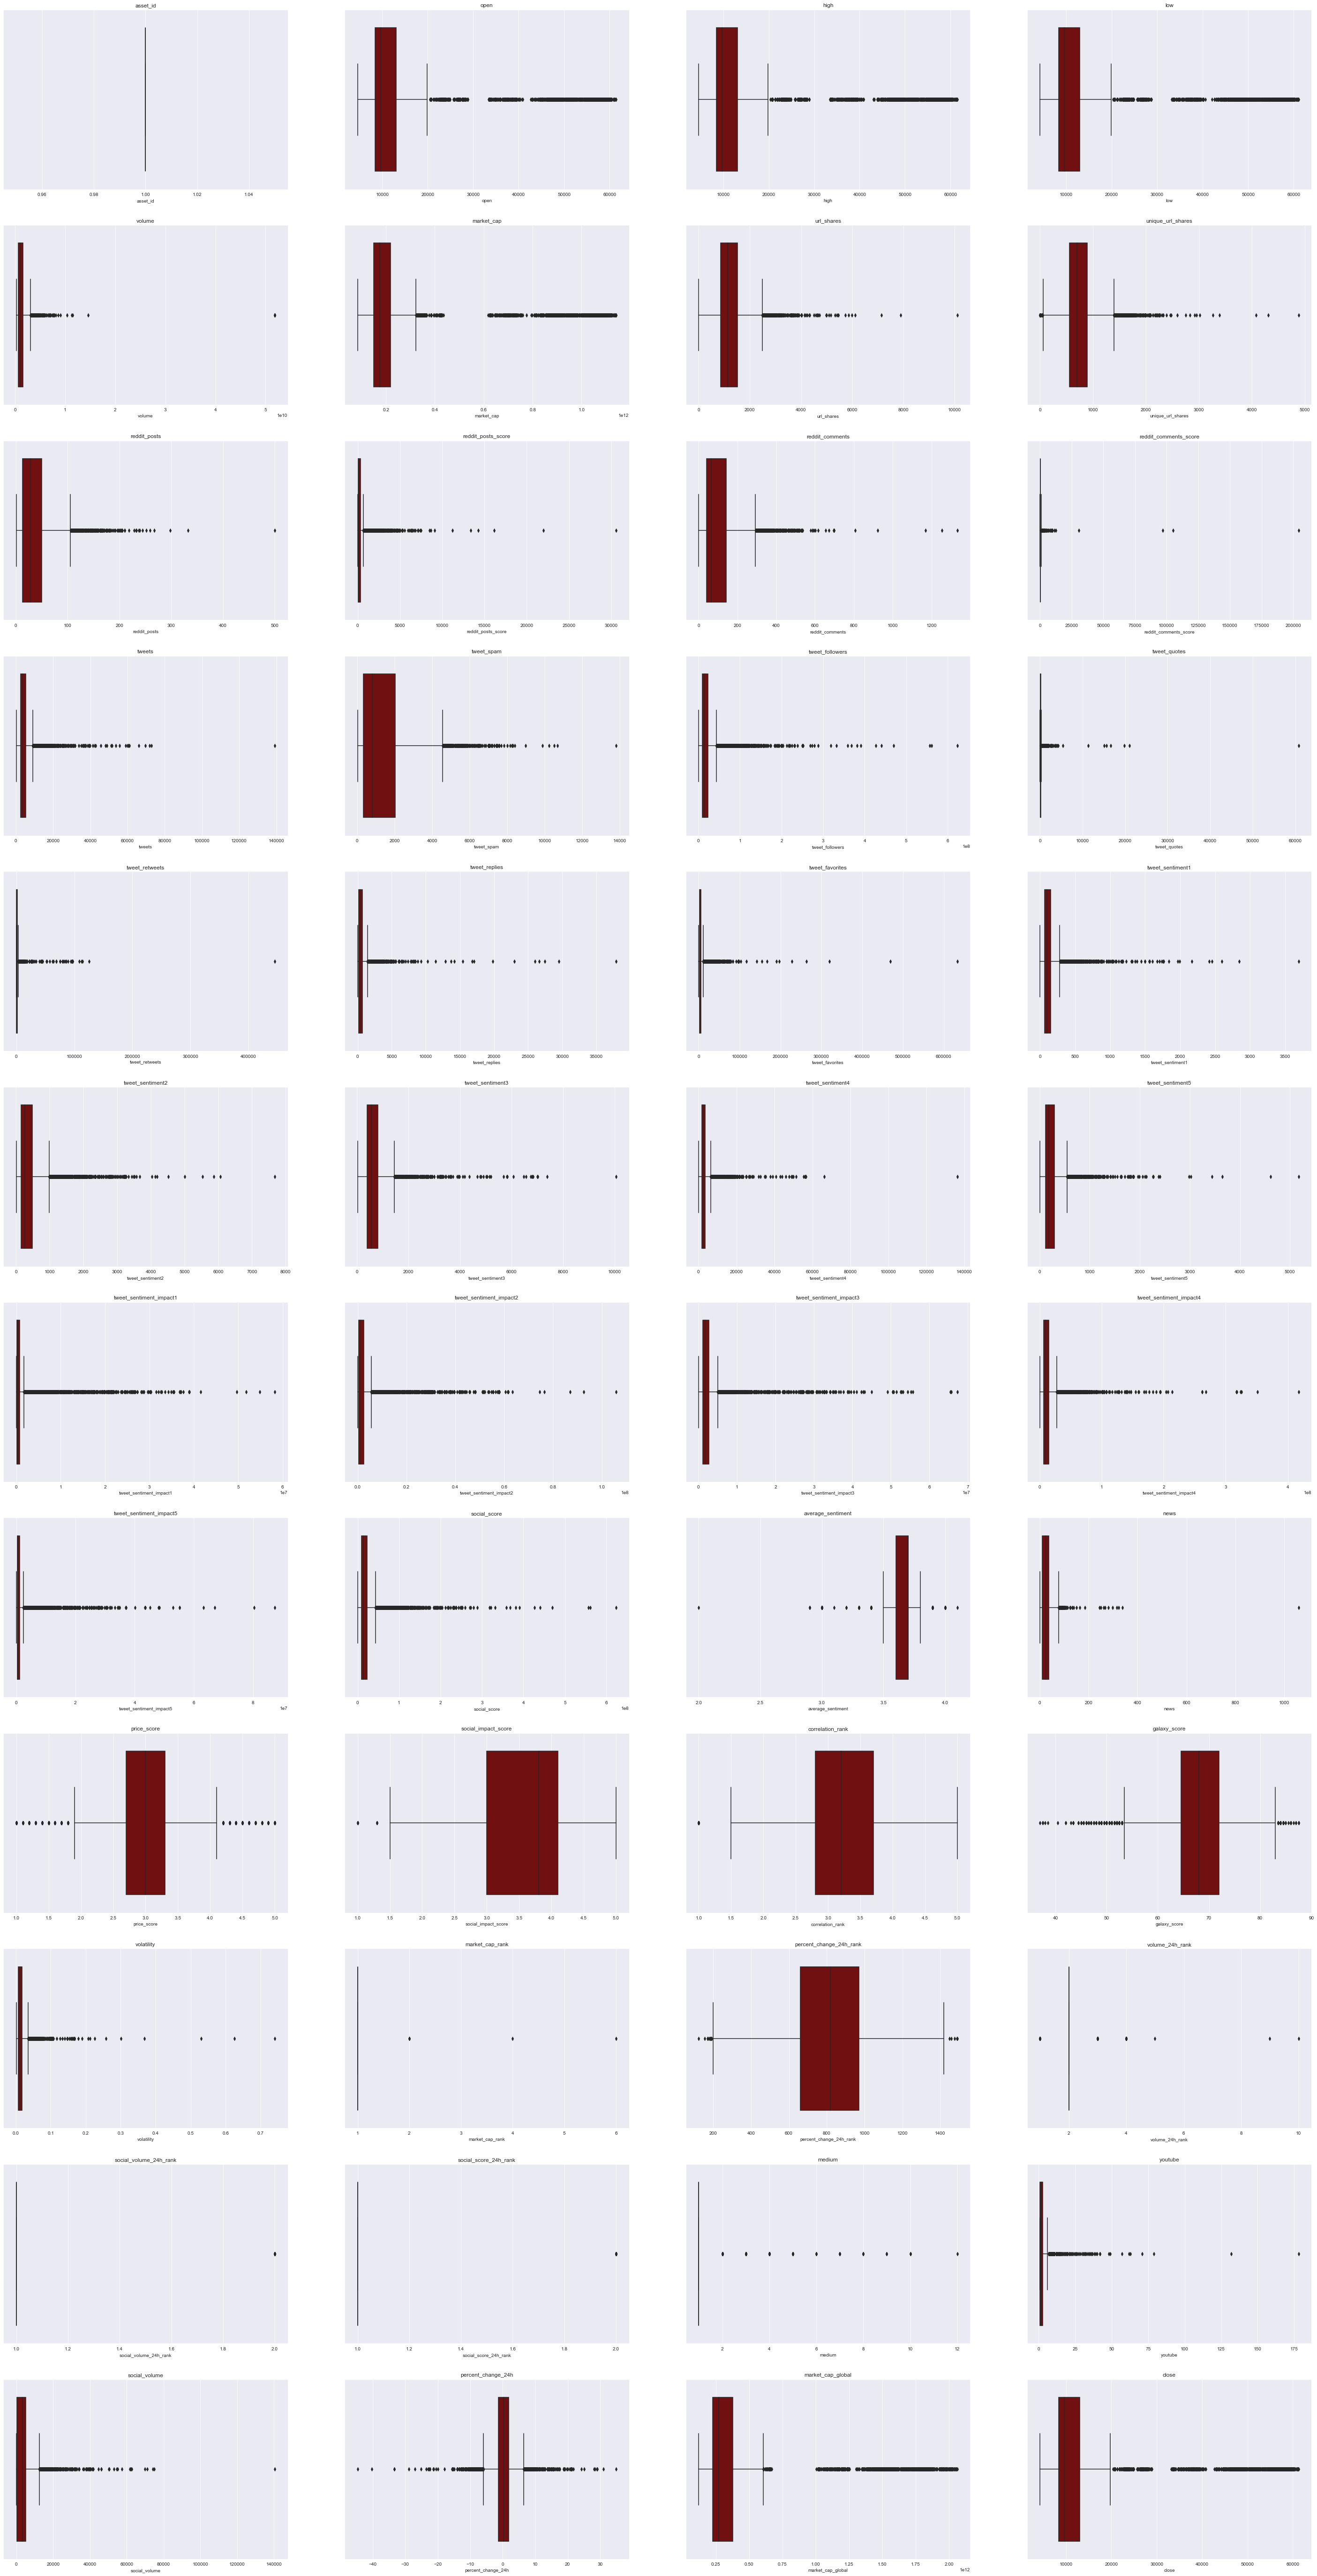

In [10]:
fig, ax = plt.subplots(12, 4, figsize=(50, 100))
col = 0
column = train.drop('id', axis=1).columns
for i in range(12):
    for j in range(4):
        sns.boxplot(train[column[col]], color='maroon', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1


* Almost all columns are left skewed
* Almost all columns have bunch of outliers
* Some columns like `youtube`, `medium`, `social_score_24h_rank`, `social_volume_24h_rank` seems to have less outliers than rest, the reason could be high percent of null values persent in them


## Data Preprocessing
### Correlation analysis

In [212]:
features = train.drop(['id', 'asset_id', 'close'], axis=1)
label = train.close

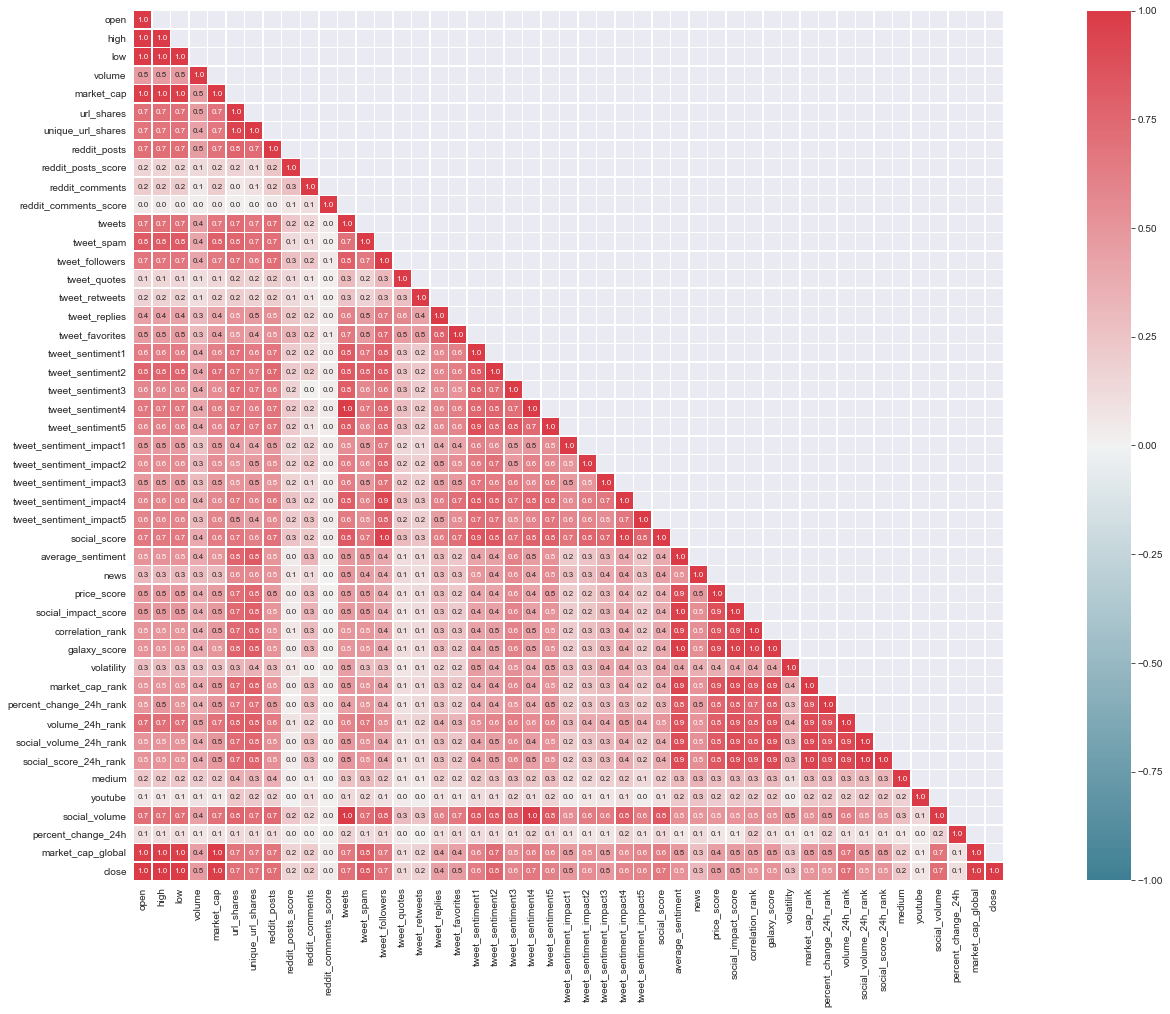

In [230]:
# Create correlation matrix
corr_matrix = train.drop(['id', 'asset_id'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

# plot
plt.figure(figsize=(30,16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(upper, vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap=cmap)
plt.show()

In [214]:
corrs = train.drop(['id', 'asset_id'], axis=1).corr().abs().sort_values('close', ascending = False)
corr_df = pd.DataFrame(corrs['close'])
close = corr_df['close'].sort_values()

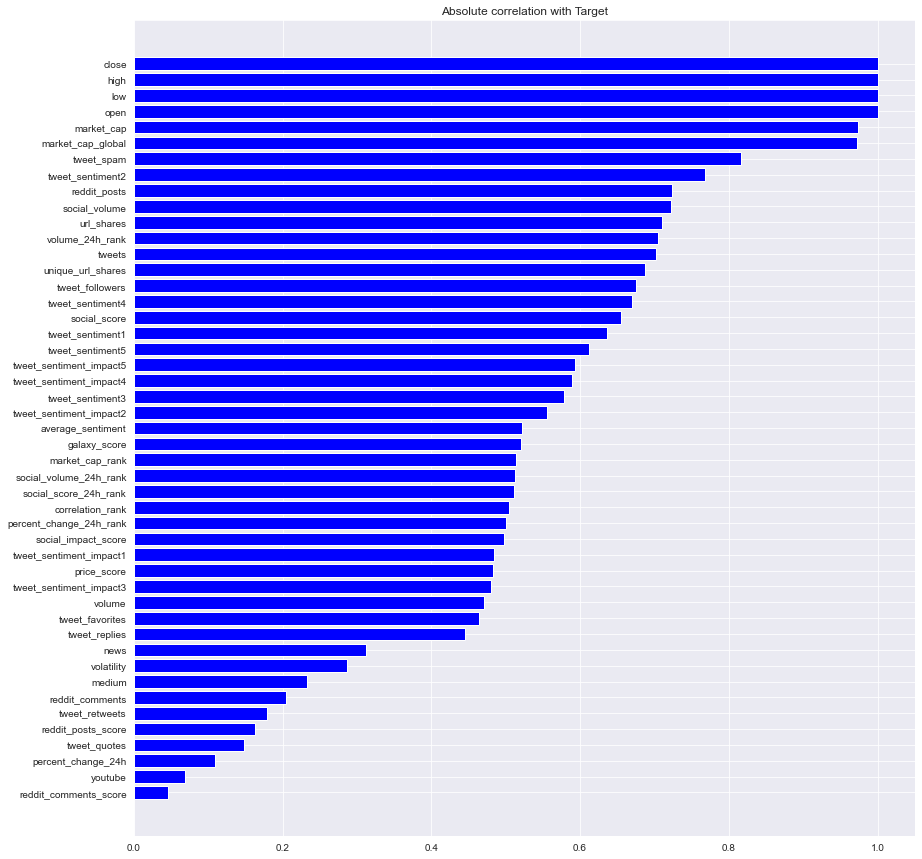

In [226]:
# columns highly correlate
plt.figure(figsize=(14,15))
plt.barh(close.index, close, color='blue', edgecolor='white')
plt.title('Absolute correlation with Target')
plt.show()

In [216]:
# Top 15 Columns 
# According to linear correlation
cor_c = list(close.tail(15).index)
cor_c

['tweet_followers',
 'unique_url_shares',
 'tweets',
 'volume_24h_rank',
 'url_shares',
 'social_volume',
 'reddit_posts',
 'tweet_sentiment2',
 'tweet_spam',
 'market_cap_global',
 'market_cap',
 'open',
 'low',
 'high',
 'close']

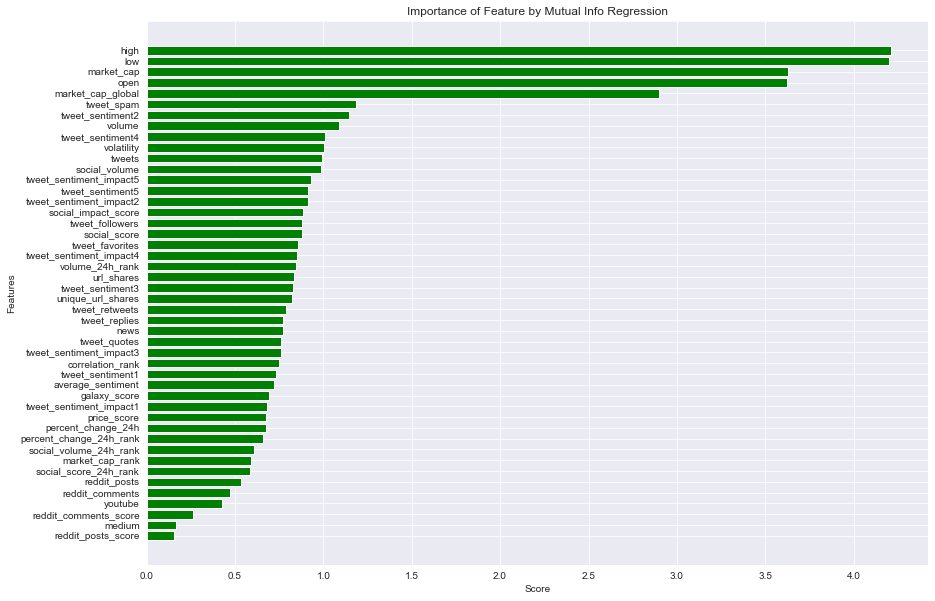

In [220]:
from sklearn.feature_selection import mutual_info_regression

# score of the dataset
df = train.dropna().copy()
features = df.drop(['id', 'asset_id', 'close'], axis=1)
label = df.close
score = mutual_info_regression(features, label)
temp = pd.DataFrame({'col': features.columns, 'score': score}).sort_values(by='score')

# lets plot it
plt.figure(figsize=(14, 10))
plt.barh(temp['col'], temp['score'], color = 'green', edgecolor='white')
plt.title('Importance of Feature by Mutual Info Regression')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [207]:
# Top 15 Columns 
inf_c = list(temp.tail(15)['col'])
inf_c

['tweet_sentiment4',
 'volatility',
 'tweet_sentiment5',
 'percent_change_24h',
 'tweet_spam',
 'youtube',
 'price_score',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact5',
 'unique_url_shares',
 'market_cap_global',
 'market_cap',
 'low',
 'open',
 'high']

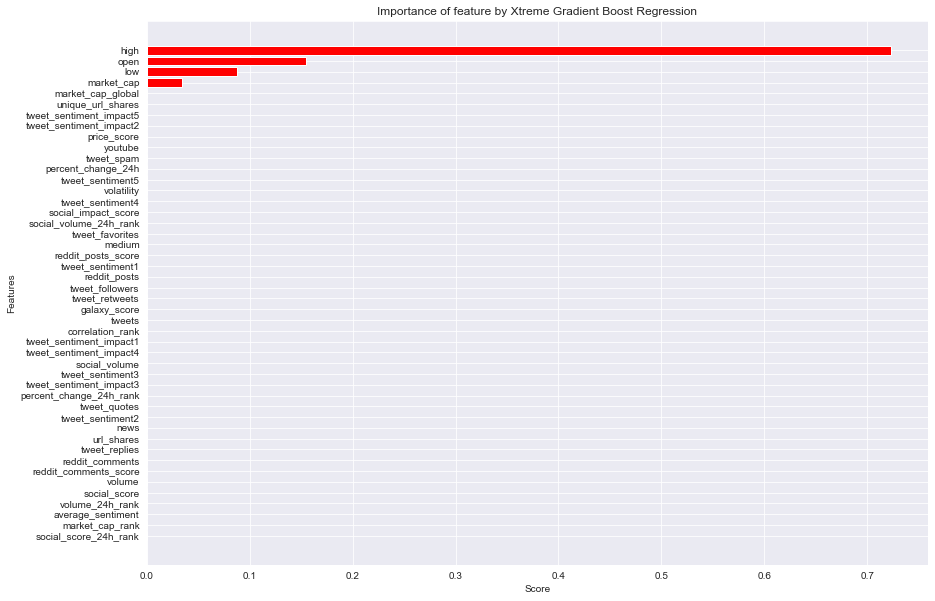

In [222]:
# lets try gradient boosting
from xgboost import XGBRegressor
gb = XGBRegressor().fit(features, label)
score = gb.feature_importances_

temp = pd.DataFrame({'col': features.columns, 'score': score}).sort_values(by='score')

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(temp['col'], temp['score'], color = 'red', edgecolor='white')
plt.title('Importance of feature by Xtreme Gradient Boost Regression')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [223]:
# Top 5 columns
xgb_c = list(temp['col'].tail(5))
xgb_c

['market_cap_global', 'market_cap', 'low', 'open', 'high']

In [45]:
train = train.fillna(0)
test = test.fillna(0)

In [140]:
# data
col = ['open', 'high', 'low', 'market_cap', 'market_cap_global']

# features and label
features = train[col]
label = train[['close']]
print(features.shape, label.shape)

# standardization
feat_scaler = StandardScaler().fit(features)
lab_scaler = StandardScaler().fit(label)

featuresS = feat_scaler.transform(features)
labelS = lab_scaler.transform(label)

# train test split
x_train, x_test, y_train, y_test = train_test_split(featuresS, labelS, test_size=0.1, random_state=25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(12632, 5) (12632, 1)
(11368, 5) (1264, 5) (11368, 1) (1264, 1)


In [141]:
# custom error function
def rootmse(y_true, y_pred):
    y_true = lab_scaler.inverse_transform(y_true)
    y_pred = lab_scaler.inverse_transform(y_pred)
    return mse(y_true, y_pred, squared=False)
rmse = make_scorer(rootmse, greater_is_better=False)

## Learnig Models

## 1. Linear Regression model

In [165]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# score
y_pred = lr_model.predict(x_test)
print(rootmse(y_test, y_pred))

# cross validation score
score = cross_val_score(lr_model, featuresS, labelS, scoring=rmse, cv=10, n_jobs=-1)
print(min(-1*score))

58.08356785992974
45.94141157555485



### Submission 1


In [109]:
test_features = test[col]
test_features = feat_scaler.transform(test_features)

# prediction
close = lr_model.predict(test_features)
close_descale = lab_scaler.inverse_transform(close)

# sub dataframe
sub = pd.DataFrame({'id': test['id']})
sub['close'] = close_descale
sub.head()

,id,close
0,ID_323Sn2,4.495049
1,ID_325SNW,11343.828479
2,ID_325uzE,6306.091579
3,ID_328qCx,4.495049
4,ID_3293uJ,4.495049


In [110]:
sub.to_csv('Submissions/lm_sub1.csv', index=False)

* Linear model submission score `57.0111961066712`

## 2. Polynomial Regression Model


In [182]:
from sklearn.preprocessing import PolynomialFeatures

In [191]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 2)
X_poly_train= poly_features.fit_transform(x_train)
X_poly_test = poly_features.transform(x_test)

In [192]:
# Training the model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [193]:
# Making predictions
poly_ypred = poly_reg.predict(X_poly_test)

In [194]:
# score
print(rootmse(y_test, poly_ypred))

42.69637901661923


In [181]:
# test_features = test[col]
# test_features = feat_scaler.transform(test_features)

# # prediction
# close = poly_reg.predict(test_features)
# close_descale = lab_scaler.inverse_transform(close)

# # sub dataframe
# sub = pd.DataFrame({'id': test['id']})
# sub['close'] = close_descale
# sub.head()

## 3. RandomForest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
# Instantiate model with 1000 decision trees
rf_model  =  RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_model  =  rf_model.fit(x_train, y_train)

In [130]:
# Making predictions based on the trained model 

rf_ypred = rf_model.predict(x_test)

In [131]:
# Measuring the accuracy of the model

print(rootmse(y_test, rf_ypred))

50.339019245721644


### Submission 3

In [156]:
test_features = test[col]
test_features = feat_scaler.transform(test_features)

# prediction
close = rf_model.predict(test_features)
close_descale = lab_scaler.inverse_transform(close)

# sub dataframe
sub = pd.DataFrame({'id': test['id']})
sub['close'] = close_descale
sub.head()

,id,close
0,ID_323Sn2,6.184564e-11
1,ID_325SNW,1.134907e+04
2,ID_325uzE,6.313903e+03
3,ID_328qCx,6.184564e-11
4,ID_3293uJ,6.184564e-11


In [101]:
sub.to_csv('Submissions/rf_sub3.csv', index=False)

* Random Forest model submission score `53.0338437575347`

## 4. XGBRegressor

In [157]:
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [158]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
xgb_ypred = xgb_model.predict(x_test)

In [164]:
# Measuring the accuracy of the model

print(rootmse(y_test, xgb_ypred))

61.24919945616442


### Submission 4

In [167]:
test_features = test[col]
test_features = feat_scaler.transform(test_features)

close = xgb_model.predict(test_features)
close_descale = lab_scaler.inverse_transform(close)

# sub dataframe
sub = pd.DataFrame({'id': test['id']})
sub['close'] = close_descale
sub.head()

,id,close
0,ID_323Sn2,0.203173
1,ID_325SNW,11351.770508
2,ID_325uzE,6289.423828
3,ID_328qCx,0.203173
4,ID_3293uJ,0.203173


In [168]:
sub.to_csv('Submissions/xgb_sub4.csv', index=False)

* XGBoost regressor model submission score `66.5761483625323`


## 5. Elastic net Regressor

In [195]:
from sklearn.linear_model import ElasticNet

# Training the model
elastic = ElasticNet(normalize=False)
elastic.fit(x_train, y_train)

# Making predictions
elastic_ypred = elastic.predict(x_test)

In [196]:
# Measuring the accuracy of the model
print(rootmse(y_test, elastic_ypred))

7800.797093622639


### Submission 5

In [197]:
test_features = test[col]
test_features = feat_scaler.transform(test_features)

close = elastic.predict(test_features)
close_descale = lab_scaler.inverse_transform(close)

# sub dataframe
sub = pd.DataFrame({'id': test['id']})
sub['close'] = close_descale
sub.head()

,id,close
0,ID_323Sn2,5901.889706
1,ID_325SNW,10992.131301
2,ID_325uzE,8679.082155
3,ID_328qCx,5901.889706
4,ID_3293uJ,5901.889706


In [236]:
sub.to_csv('Submissions/elastic_sub5.csv', index=False)

* XGBoost regressor model submission score `7497.46901613921`
